Importing libraries for data manipulation and visualization.

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat


Reading the csv file into a dataframe.Upon investigation, I found some of the entries to be incomplete by limited evidence. Then each column of the dataframe is tranformed into a series for accessibilty.

In [13]:

db = pd.read_csv('DataBreaches(2004-2021).csv')
db.drop(db.loc[db['Organization type']=='personal and demographic data about residents and their properties of US'].index, inplace=True)
db.drop(db.loc[db['Entity'] == 'Unknown agency(believed to be tied to United States Census Bureau)'].index, inplace=True)
db.drop(db.loc[db['Entity'] == 'Massive American business hack including 7-Eleven and Nasdaq'].index, inplace=True)
db.drop(db.loc[db['Method']=='intentionally lost'].index, inplace=True)
db.drop(db.loc[db['Method']=='misconfiguration/poor security'].index, inplace=True)
db.drop(db.loc[db['Method']=='unknown'].index, inplace=True)
db.drop(db.loc[db['Method']=='improper setting, hacked'].index,inplace=True)

#I changed the method of this entry because I found supported articles that argues against the reported value.
db_se = db.loc[(db['Method']=='poor security/inside job') & (db['Entity']=='Marriott International')].index.item()
db.loc[db_se,'Method'] = 'social engineering'

company=db['Entity']
year=db['Year']
records=db['Records']
organization_type=db['Organization type']
method = db['Method']

#I changed the year of two enties for consistency and based on public discovery 
clean_year=year.replace('2018-2019',2019)
clean_year=clean_year.replace('2014 and 2015',2015)
db['Year'] = clean_year.astype(int)
year = db['Year']


I found that my dataset has 266 unique companies with 48 unique types of orgranizations using the len function on top of pandas's unique function.Then I borrowed the mean function from statistics to calculate the avererage of compromised records, 4243665. Next, I want to find the sum of compromised records equaling a total of 12052009802.Lastly, I found the least and maximum amounts of compromised records.The least amount of compromised records is 6700 whereas the maximum amount of compromised records is 3000000000.

In [14]:

company_num_unique=len(company.unique())
organization_type_num_unique=len(organization_type.unique())
print('The number of unique companies breached:',company_num_unique)
print('The number of unique types of organizations:', organization_type_num_unique)

avg = stat.mean(records)
print('The average of compromised records:',avg,)
sum_records = sum(records)
print('The total amount of compromised records:',sum_records)

min_records = min(records)
print('The smallest amoumt of compromised records:',min_records)

max_records = max(records)
print('The largest amount of compromised records:',max_records)

attack_company=[]
for company in company.value_counts()[lambda x: x >= 2].index:
    attack_company.append(company)
attack_company_series= pd.Series(attack_company)
print('The number of companies that have been breached at least twiced:',len(attack_company_series),'\n')
    

The number of unique companies breached: 266
The number of unique types of organizations: 48
The average of compromised records: 42436654.23239437
The total amount of compromised records: 12052009802
The lowest amoumt of compromised records: 6700
The highest amount of compromised records: 3000000000
The number of companies that have been breached at least twiced: 13 



The series_replace function replaces a number of strings with a given a string. The series_query function prints the companies' names when the method or organization type is found within the dataset.

In [15]:

def series_replace(db_data,cate,string):
    '''A function that replaces a number of strings with a given a string'''
    data_mod=db_data.replace(cate,string).str.lower()
    data_mod.sort_values(inplace = True)
    return data_mod

def series_query(series,db_data,string):
    '''A function that prints the companies' names when the method or organization type is found within the dataset'''
    for var, company in zip(series,db_data):
        if var == string:
            print(company)
    return
    

In an effort to clean up the data, I researched some of the data beaches in order to see if the reported method is accurate versus non-wikipedia articles.This is a plot that shows the number of occurrences per the method of breach. As it is shown in the graph, hacking is the most frequent method for a data breach between 2004-2021. On the other side, an accidental upload or unprotected api is the least frequent method.

Text(0.5, 1.0, 'Number of Occurrences vs Method of the Breach')

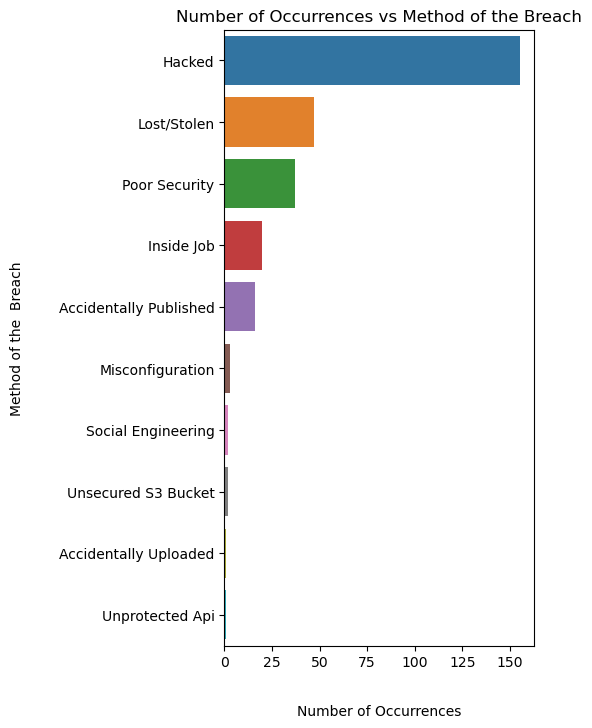

In [16]:

method=series_replace(db['Method'],['publicly accessible Amazon Web Services (AWS) server'],'unsecured S3 bucket')
method=series_replace(method,['accidentally exposed','data exposed by misconfiguration','rogue contractor'],'misconfiguration')
method=series_replace(method,['poor security / hacked'],'poor security')
method=series_replace(method,['inside job, hacked','poor security/inside job'],'inside job')
method=series_replace(method,['lost / stolen media','lost / stolen computer'],'lost/stolen')
method = pd.Series([i.title()for i in method])

plt.figure(figsize=(4,8))
sns.countplot(y=method.values,order=method.value_counts().index)
plt.ylabel('Method of the  Breach',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Method of the Breach')


In an effort to clean up the data, I researched some of the companies in order to find their right type/industry.This is a plot that shows the number of occurrences per type of organization. As it is shown in the graph, healthcare edged out for web for the most frequent type of organization. On the other side, there is five-way between advertising, fashion, data broker, ticket distribution, and market analysis for the least frequent type of organization.

Text(0.5, 1.0, 'Number of Occurrences vs Type of Organization')

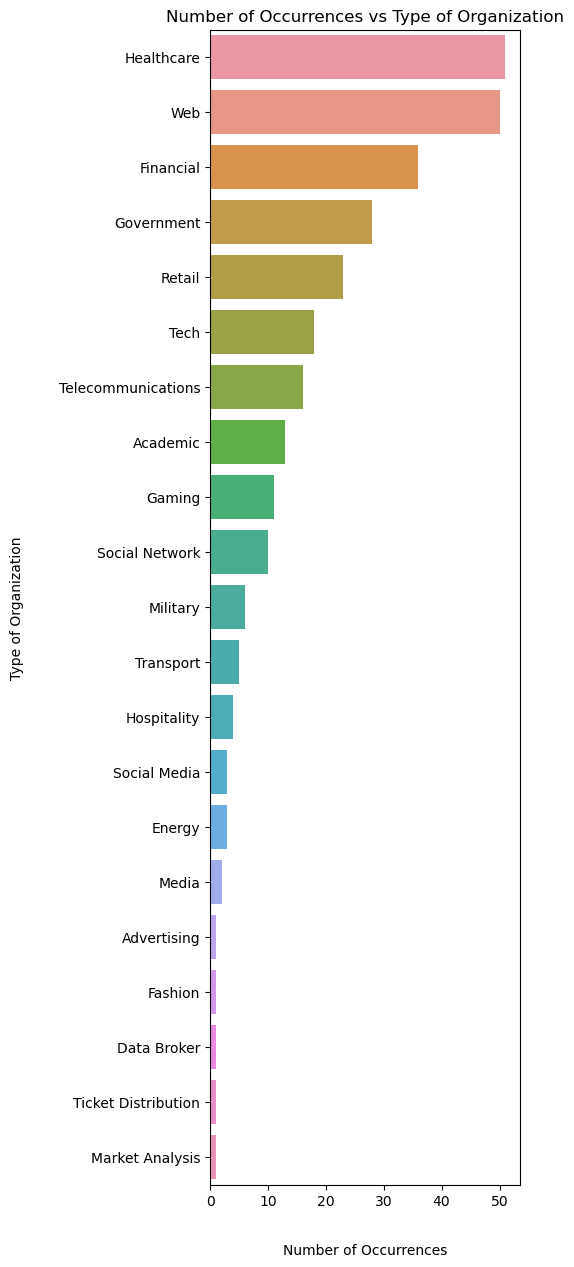

In [17]:

organization_type=series_replace(db['Organization type'],['telecoms','telecom','mobile carrier','online marketing'],'telecommunications')
organization_type=series_replace(organization_type,['tech, retail','tech, web','local search'],'tech')
organization_type=series_replace(organization_type,['government, database','government, military','military, healthcare','government, healthcare','clinical laboratory'],'healthcare')
organization_type=series_replace(organization_type,['financial service company','financial, credit reporting','banking'],'financial')
organization_type=series_replace(organization_type,['game'],'gaming')
organization_type=series_replace(organization_type,['special public corporation'],'government')
organization_type=series_replace(organization_type,['phone accessories','consumer goods','shopping'],'retail')
organization_type=series_replace(organization_type,['educational services'],'academic')
organization_type=series_replace(organization_type,['restaurant','hotel'],'hospitality')
organization_type=series_replace(organization_type,['web, gaming','web, military'],'web')
organization_type=series_replace(organization_type,['web, tech'],'social media')
organization_type=series_replace(organization_type,['question & answer','social networking'],'social network')

organization_type=pd.Series([i.title()for i in organization_type])

plt.figure(figsize=(4,15))
sns.countplot(y = organization_type.values,order=organization_type.value_counts().index)
plt.ylabel('Type of Organization',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Type of Organization')


This is a plot that shows the number of occurrences per year. As it is shown in the graph, the most amount of the data breaches occured in 2011 whereas, the least amount of the data breaches occured in 2004.   

Text(0.5, 1.0, 'Year of the Breach vs Number of Occurrences')

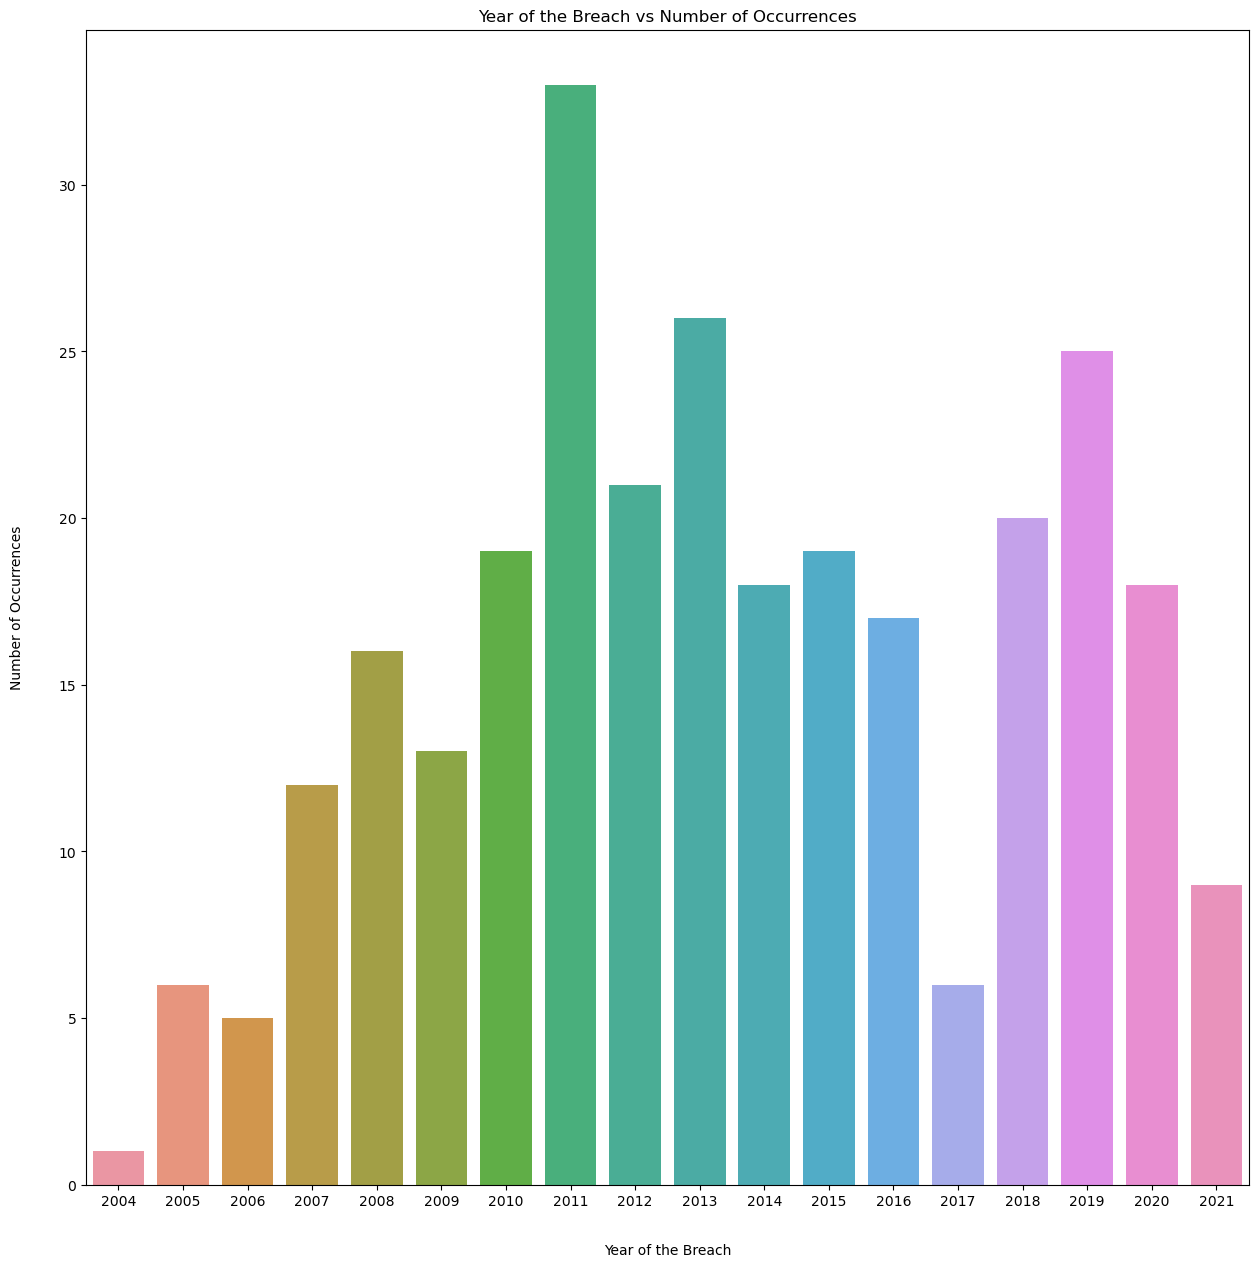

In [18]:

year_order=[i for i in range(2004,2022)]
plt.figure(figsize=(15,15))
sns.countplot(x = year.values,order=year_order)
plt.xlabel('Year of the Breach',labelpad=25)
plt.ylabel('Number of Occurrences',labelpad=25)
plt.title('Year of the Breach vs Number of Occurrences')


This is a plot that show the companies that have been breached at least 2 times. As it is shown in the graph, Facebook takes the top spot with 5 breaches whereas, there is a 10-way tie for companies who have 2 breaches.

                               Company  Number of Breaches
0                             Facebook                   5
1                            Citigroup                   3
2                                  AOL                   3
3                                Yahoo                   2
4           Countrywide Financial Corp                   2
5                          Bell Canada                   2
6                                 Uber                   2
7                        TD Ameritrade                   2
8                                 AT&T                   2
9               Marriott International                   2
10  University of California, Berkeley                   2
11                             MongoDB                   2
12                     JP Morgan Chase                   2


Text(0.5, 1.0, 'Companies that have been breached at least 2 times')

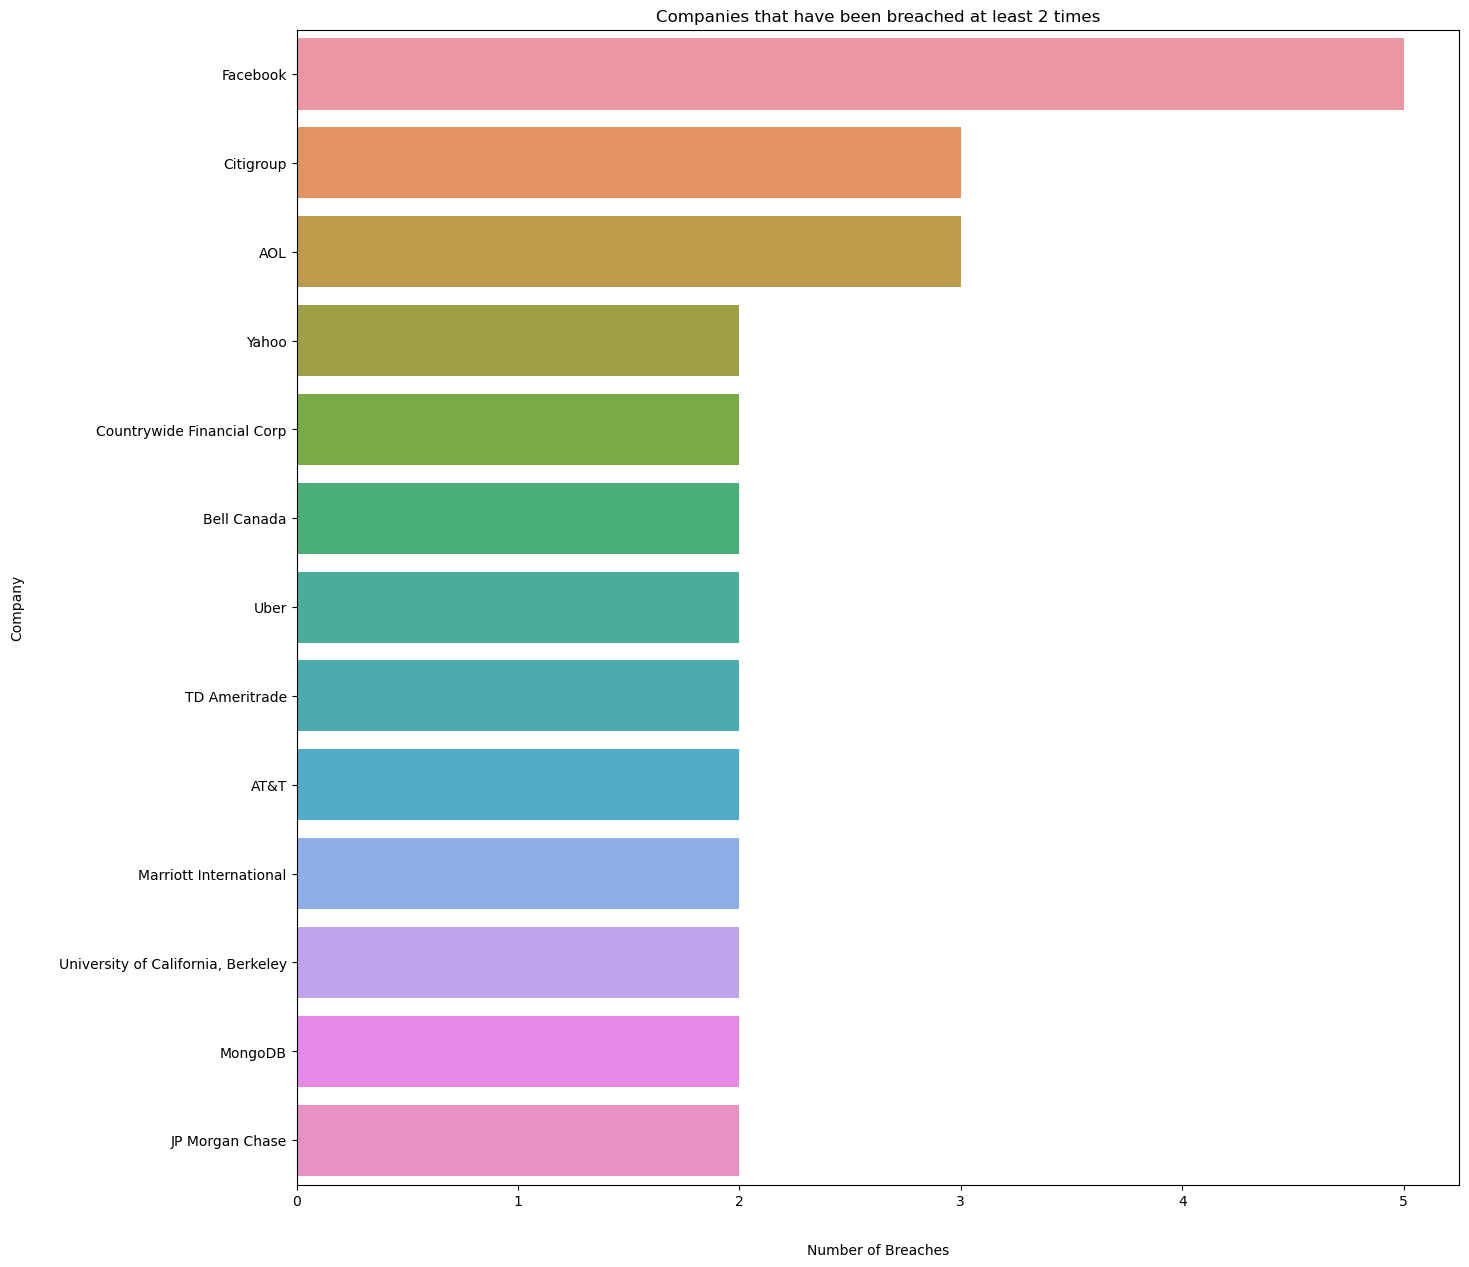

In [34]:

comp_att= db['Entity'].value_counts()[lambda x: x >= 2].to_frame('Number of Breaches').rename_axis('Company').reset_index()

plt.figure(figsize=(15,15))
sns.barplot(data = comp_att, y = 'Company', x = 'Number of Breaches')
plt.ylabel('Company',labelpad=25)
plt.xlabel('Number of Breaches',labelpad=25)
plt.title('Companies that have been breached at least 2 times')


This is a plot that shows the yearly averages betwwen 2004-2021. As it is shown in the graph, the largest average of compromised records occured during 2019 with 137,113,833 whereas the smallest average of compromised records occured during 2004 with 510,000.

    Year    Records
0   2004     510000
1   2005    7804166
2   2006   10060000
3   2007   12773867
4   2008    4316656
5   2009   19651383
6   2010     841077
7   2011    6902670
8   2012   12801887
9   2013  133439802
10  2014   47276555
11  2015    6421971
12  2016   31797830
13  2017   42461146
14  2018   63778297
15  2019  137113833
16  2020   42921351
17  2021   27798803 



Text(0.5, 1.0, 'Year of the Breach vs Yearly Average of compromised records')

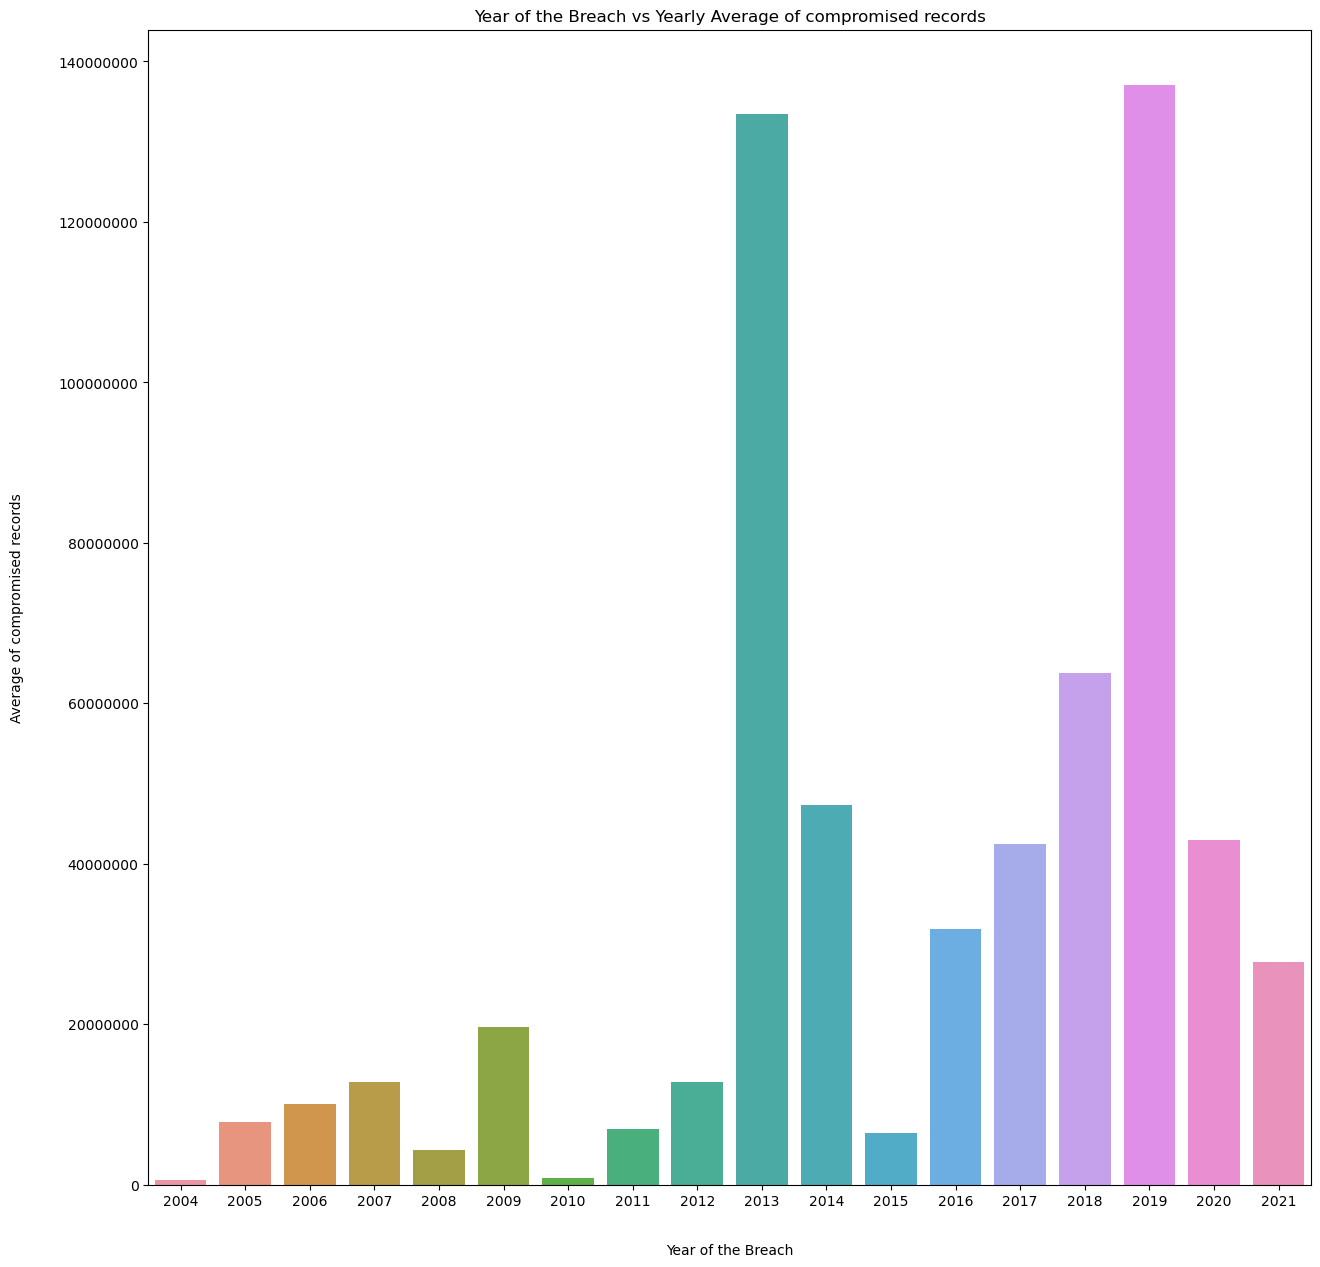

In [20]:

yearly_avg=db.groupby('Year')['Records'].mean().to_frame().astype('int64').reset_index()
print(yearly_avg,'\n')

plt.figure(figsize=(15,15))
sns.barplot(x='Year', y='Records', data=yearly_avg)
plt.ticklabel_format(style='plain', axis='y' )
plt.xlabel('Year of the Breach',labelpad=25)
plt.ylabel('Average of compromised records',labelpad=25)
plt.title('Year of the Breach vs Yearly Average of compromised records')
